<a href="https://colab.research.google.com/github/piyush02nir/Retail-Sales-Prediction/blob/main/Retail_Sales_Prediction.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

<font color="sky blue"> <h1>**Retail Sales Prediction**</h1></font><hr color="grey">

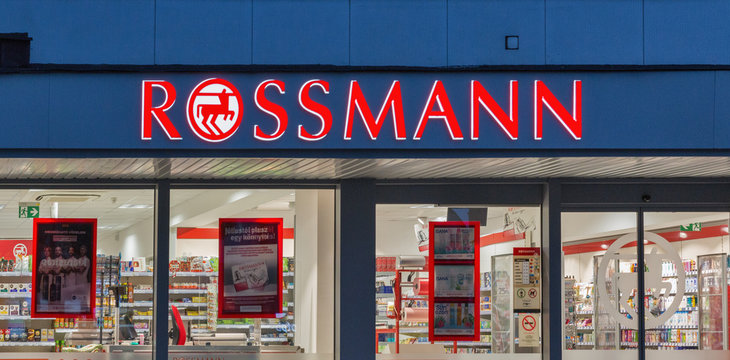

<font color="sky blue"> <h3><b>Business Context</b></h3><hr color="grey"></font>
<font color="sky blue">**Rossmann operates over 3,000 drug stores in 7 European countries**.</font> Currently, Rossmann store managers are tasked with predicting their daily sales for up to six weeks in advance. Store sales are influenced by many factors, including promotions, competition, school and state holidays, seasonality, and locality. With thousands of individual managers predicting sales based on their unique circumstances, the accuracy of results can be quite varied.
You are provided with historical sales data for <font color="sky blue">**1,115 Rossmann stores**.</font> The task is to <font color="sky blue">**forecast the "Sales" column for the test set**</font>. Note that some stores in the dataset were temporarily closed for refurbishment.<hr color="grey">

<font color="sky blue"> <h3><b>Data Description</b></h3><hr color="grey"></font>
We have been provided with 2 data sets.
####<font color="sky blue">**1) Rosemann store Data**:</font> Information about sales and related factors<br>



*   <font color="sky blue">**Store**:</font> Unique Store Id.
*   <font color="sky blue">**DayOfWeek**:</font> No. of day of the week.
*   <font color="sky blue">**Date**:</font> current Date of the day.
*   <font color="sky blue">**Sales**:</font> no. of sales of the day.
*   <font color="sky blue">**Customers**:</font> footfall of the day.
*   <font color="sky blue">**Open**:</font> store is open or closed.
*   <font color="sky blue">**Promo**:</font> Store running promotion or not.
*   <font color="sky blue">**StateHoliday**:</font> state holiday or not.
*   <font color="sky blue">**SchoolHoliday**:</font> school holiday or not.

####<font color="sky blue">**2) Store**:</font> Information about the store
*   <font color="sky blue">**Store**:</font> Unique Store Id.
*   <font color="sky blue">**StoreType**:</font> 4 different type of stores a,b,c,d.
*   <font color="sky blue">**Assortment**:</font> A collection of goods or services that a business provides to a consumer.
*   <font color="sky blue">**CompetitionDistance**:</font>	distance in meters to the nearest competitor store.
*   <font color="sky blue">**CompetitionOpenSinceMonth**:</font> Month in which the competition store was open.
*   <font color="sky blue">**CompetitionOpenSinceYear**:</font> Year in which the competition store was open.
*   <font color="sky blue">**Promo2**:</font> Store running consecutive promotion or not.
*   <font color="sky blue">**Promo2SinceWeek**:</font>	 calendar week when the store started participating in Promo2.
*   <font color="sky blue">**Promo2SinceYear**:</font>	year when the store started participating in Promo2.
*   <font color="sky blue">**PromoInterval**:</font>The month in which the promotion starts eg: Jan,Apr,Jul,Oct.

<hr color="grey">


### <font color = "sky blue"><b>Importing all required libraries and setting Jupyter Notebook</b>

In [ ]:
#Importing required libraries
import numpy as np,pandas as pd, matplotlib.pyplot as plt
import plotly.express as px
import plotly.figure_factory as ff
import seaborn as sns, datetime, ast, time, sys, math
import warnings
warnings.filterwarnings('ignore')

#For showing all outputs in one cell
from IPython.core.interactiveshell import InteractiveShell
InteractiveShell.ast_node_interactivity = "all"
from math import *

#required machine learning libraries
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import MinMaxScaler
import statsmodels.api as sm
from sklearn.linear_model import LinearRegression
from statsmodels.stats.outliers_influence import variance_inflation_factor 
from sklearn.feature_selection import RFE
from sklearn.metrics import mean_squared_error, r2_score
from sklearn.linear_model import BayesianRidge
from sklearn.linear_model import LassoLars
from sklearn.linear_model import Ridge
from sklearn.metrics import mean_absolute_error
from sklearn.metrics import mean_absolute_percentage_error
from sklearn.tree import DecisionTreeRegressor
from sklearn.ensemble import RandomForestRegressor 
from sklearn.neighbors import KNeighborsRegressor
from sklearn.model_selection import RandomizedSearchCV
from sklearn.linear_model import ElasticNet


In [ ]:
t1 = time.time()

In [ ]:

# default='warn'. suppresing unnecessary warnings
pd.options.mode.chained_assignment = None  
pd.set_option('display.max_rows', None)
pd.set_option('display.max_columns', None)
warnings.filterwarnings('ignore')

<hr color="grey">

### <font color = "sky blue">**Loading csv files for Rossmann Stores and Store into a DataFrame**

In [ ]:
#mounting drive 
from google.colab import drive
drive.mount('/content/drive')

Mounted at /content/drive


In [ ]:
#path of the csv files required
df_rossmann = pd.read_csv('/content/drive/MyDrive/Almabetter/Capstone_project_II/Rossmann Stores Data.csv')
df_store = pd.read_csv('/content/drive/MyDrive/Almabetter/Capstone_project_II/store.csv')

In [ ]:
#Shivank
# df_rossmann = pd.read_csv('/content/drive/MyDrive/retail sales data/Rossmann Stores Data.csv')
# df_store = pd.read_csv('/content/drive/MyDrive/retail sales data/store (3).csv')

<hr color="grey">

### <font color = "sky blue">**Checking Data for Rossmann Stores**

In [ ]:
print('------------------------------------Head---------------------------------------\n')
df_rossmann.head()            #checking 1st 5 rows of the df
print('\n------------------------------------Tail---------------------------------------\n')
df_rossmann.tail()            #checking last 5 rows of the df
print('\n------------------------------------Shape-------------------------------------\n')
                              #no. of rows and columns
print(f'Rows: {df_rossmann.shape[0]}, Columns: {df_rossmann.shape[1]}\n')   
print('------------------------------------Info--------------------------------------\n')
df_rossmann.info()            #information about the df
print('\n------------------------------------describe--------------------------------------\n')
df_rossmann.describe()        #statictical description of the df
print('\n------------------------------------NUll_Value_count--------------------------------------\n')
df_rossmann.isnull().sum()    #sum of the null values

------------------------------------Head---------------------------------------



,Store,DayOfWeek,Date,Sales,Customers,Open,Promo,StateHoliday,SchoolHoliday
0,1,5,2015-07-31,5263,555,1,1,0,1
1,2,5,2015-07-31,6064,625,1,1,0,1
2,3,5,2015-07-31,8314,821,1,1,0,1
3,4,5,2015-07-31,13995,1498,1,1,0,1
4,5,5,2015-07-31,4822,559,1,1,0,1



------------------------------------Tail---------------------------------------



,Store,DayOfWeek,Date,Sales,Customers,Open,Promo,StateHoliday,SchoolHoliday
1017204,1111,2,2013-01-01,0,0,0,0,a,1
1017205,1112,2,2013-01-01,0,0,0,0,a,1
1017206,1113,2,2013-01-01,0,0,0,0,a,1
1017207,1114,2,2013-01-01,0,0,0,0,a,1
1017208,1115,2,2013-01-01,0,0,0,0,a,1



------------------------------------Shape-------------------------------------

Rows: 1017209, Columns: 9

------------------------------------Info--------------------------------------

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1017209 entries, 0 to 1017208
Data columns (total 9 columns):
 #   Column         Non-Null Count    Dtype 
---  ------         --------------    ----- 
 0   Store          1017209 non-null  int64 
 1   DayOfWeek      1017209 non-null  int64 
 2   Date           1017209 non-null  object
 3   Sales          1017209 non-null  int64 
 4   Customers      1017209 non-null  int64 
 5   Open           1017209 non-null  int64 
 6   Promo          1017209 non-null  int64 
 7   StateHoliday   1017209 non-null  object
 8   SchoolHoliday  1017209 non-null  int64 
dtypes: int64(7), object(2)
memory usage: 69.8+ MB

------------------------------------describe--------------------------------------



,Store,DayOfWeek,Sales,Customers,Open,Promo,SchoolHoliday
count,1.017209e+06,1.017209e+06,1.017209e+06,1.017209e+06,1.017209e+06,1.017209e+06,1.017209e+06
mean,5.584297e+02,3.998341e+00,5.773819e+03,6.331459e+02,8.301067e-01,3.815145e-01,1.786467e-01
std,3.219087e+02,1.997391e+00,3.849926e+03,4.644117e+02,3.755392e-01,4.857586e-01,3.830564e-01
min,1.000000e+00,1.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00
25%,2.800000e+02,2.000000e+00,3.727000e+03,4.050000e+02,1.000000e+00,0.000000e+00,0.000000e+00
50%,5.580000e+02,4.000000e+00,5.744000e+03,6.090000e+02,1.000000e+00,0.000000e+00,0.000000e+00
75%,8.380000e+02,6.000000e+00,7.856000e+03,8.370000e+02,1.000000e+00,1.000000e+00,0.000000e+00
max,1.115000e+03,7.000000e+00,4.155100e+04,7.388000e+03,1.000000e+00,1.000000e+00,1.000000e+00



------------------------------------NUll_Value_count--------------------------------------



Store            0
DayOfWeek        0
Date             0
Sales            0
Customers        0
Open             0
Promo            0
StateHoliday     0
SchoolHoliday    0
dtype: int64

<font color="sky blue"><h3>**The data has no null values**</h3>

In [ ]:
#As date column is in object format converting it into Date Time format.
df_rossmann['Date'] = pd.DatetimeIndex(df_rossmann['Date'])

In [ ]:
#as StateHoliday column is in object lets check its unique values 
df_rossmann['StateHoliday'].unique()

array(['0', 'a', 'b', 'c', 0], dtype=object)

In [ ]:
#replacing string '0' with int 0
df_rossmann['StateHoliday'].replace({'0':0}, inplace=True)

In [ ]:
#checking the data
df_rossmann.iloc[1113:1118] #Store no. repeats on every new date

,Store,DayOfWeek,Date,Sales,Customers,Open,Promo,StateHoliday,SchoolHoliday
1113,1114,5,2015-07-31,27508,3745,1,1,0,1
1114,1115,5,2015-07-31,8680,538,1,1,0,1
1115,1,4,2015-07-30,5020,546,1,1,0,1
1116,2,4,2015-07-30,5567,601,1,1,0,1
1117,3,4,2015-07-30,8977,823,1,1,0,1


In [ ]:
val = (df_rossmann['Store'] == 1).sum() #counting data for no. of days
print(f'Total no. of days in the data set are: {val} days')

Total no. of days in the data set are: 942 days


In [ ]:
# Checking if any dates are missing
df_rossmann['Date'].iloc[0] - df_rossmann['Date'].iloc[-1] #last date is not included 

Timedelta('941 days 00:00:00')

<font color = "sky blue"><h4>**No dates are missing in the data**</h4>

In [ ]:
#check the no of the days the store remains closed
val = ((df_rossmann['Open'] == 0 ) & (df_rossmann['Store'] == 1)).sum()
print(f'Total no. of days store remain closed: {val} days')

Total no. of days store remain closed: 161 days


In [ ]:
#seeing max values of sales and customers.
val_1,val_2 = df_rossmann['Sales'].max(),df_rossmann['Customers'].max()
print(f'Maximum sales recorded: {val_1},\nMaxmimum customers recorded: {val_2}')

Maximum sales recorded: 41551,
Maxmimum customers recorded: 7388


In [ ]:
df_rossmann['StateHoliday'].unique()
print('\n---')
df_rossmann['SchoolHoliday'].unique()

array([0, 'a', 'b', 'c'], dtype=object)


---


array([1, 0])

Check if sales are there even if store is closed for data discrepency.

### <font color = "sky blue">**Outliers detection** </font>

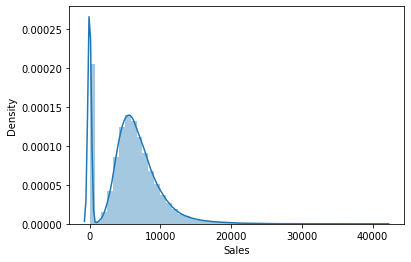

In [ ]:
#checking the distribution plot of the sales column.
sns.distplot(df_rossmann['Sales'].astype(np.int64))

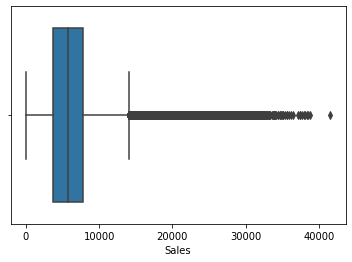

In [ ]:
#checking the box plot of the sales column.
sns.boxplot(df_rossmann['Sales'].astype(np.int64))

In [ ]:
#statistical values to understand data.
val1 = df_rossmann['Sales'].mean()
val2 = df_rossmann['Sales'].median()
val3 = df_rossmann['Sales'].mode()
print(f'For the sales column:\nMean: {val}\nMedian: {val2}\nMode: {val3}')

For the sales column:
Mean: 161
Median: 5744.0
Mode: 0    0
dtype: int64


Binning the data in ranges i.e. 0-5000 low sales, 5000 - 10,000 ,medium sales , 10,000 -20,000 high sales , 20k and above very high sales


<font color = "sky blue"><h3> **Observations:**</h3></font>
*   **Distribution plot for sales column**:

1.   Sales which shows 0 observation is the part where stores were <font color = "sky blue">**closed due to holidays or for refurbishment**.</font>
2.   Maximum Values of the Data lies on the left side of the plot with almost a flat line towars right i.e. the data is <font color = "sky blue">**right skewed**.</font>

*   **Box plot for sales column**:


1.   Maximum Data lies between the <font color = "sky blue">**100% quertile range of 0 - 14,000**.</font>
2.   Outliers are seen after <font color = "sky blue">**14,000.**

*   <font color = "sky blue">**Outliers will not be removed now as the zero sales looks important for further EDA**.</font>

*   The Mean median and mode will change when the 0 sales figures and outliers will be removed. 














<hr color="grey">

### <font color = "sky blue">**Checking data for the store**

In [ ]:
print('------------------------------------Head---------------------------------------')
df_store.head()               #checking 1st 5 rows of the df
print('------------------------------------Tail---------------------------------------')
df_store.tail()               #checking last 5 rows of the df
print('------------------------------------Shape-------------------------------------\n')
                              #no. of rows and columns
print(f'Rows: {df_store.shape[0]}, Columns: {df_store.shape[1]}\n')
print('------------------------------------Info--------------------------------------\n')
df_store.info()               #information about the df
print('------------------------------------describe--------------------------------------\n')
df_store.describe()           #statictical description of the df
print('------------------------------------NUll_Value_count--------------------------------------\n')
df_store.isnull().sum()       #sum of the null values

------------------------------------Head---------------------------------------


,Store,StoreType,Assortment,CompetitionDistance,CompetitionOpenSinceMonth,CompetitionOpenSinceYear,Promo2,Promo2SinceWeek,Promo2SinceYear,PromoInterval
0,1,c,a,1270.0,9.0,2008.0,0,NaN,NaN,NaN
1,2,a,a,570.0,11.0,2007.0,1,13.0,2010.0,"Jan,Apr,Jul,Oct"
2,3,a,a,14130.0,12.0,2006.0,1,14.0,2011.0,"Jan,Apr,Jul,Oct"
3,4,c,c,620.0,9.0,2009.0,0,NaN,NaN,NaN
4,5,a,a,29910.0,4.0,2015.0,0,NaN,NaN,NaN


------------------------------------Tail---------------------------------------


,Store,StoreType,Assortment,CompetitionDistance,CompetitionOpenSinceMonth,CompetitionOpenSinceYear,Promo2,Promo2SinceWeek,Promo2SinceYear,PromoInterval
1110,1111,a,a,1900.0,6.0,2014.0,1,31.0,2013.0,"Jan,Apr,Jul,Oct"
1111,1112,c,c,1880.0,4.0,2006.0,0,NaN,NaN,NaN
1112,1113,a,c,9260.0,NaN,NaN,0,NaN,NaN,NaN
1113,1114,a,c,870.0,NaN,NaN,0,NaN,NaN,NaN
1114,1115,d,c,5350.0,NaN,NaN,1,22.0,2012.0,"Mar,Jun,Sept,Dec"


------------------------------------Shape-------------------------------------

Rows: 1115, Columns: 10

------------------------------------Info--------------------------------------

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1115 entries, 0 to 1114
Data columns (total 10 columns):
 #   Column                     Non-Null Count  Dtype  
---  ------                     --------------  -----  
 0   Store                      1115 non-null   int64  
 1   StoreType                  1115 non-null   object 
 2   Assortment                 1115 non-null   object 
 3   CompetitionDistance        1112 non-null   float64
 4   CompetitionOpenSinceMonth  761 non-null    float64
 5   CompetitionOpenSinceYear   761 non-null    float64
 6   Promo2                     1115 non-null   int64  
 7   Promo2SinceWeek            571 non-null    float64
 8   Promo2SinceYear            571 non-null    float64
 9   PromoInterval              571 non-null    object 
dtypes: float64(5), int64(2), object

,Store,CompetitionDistance,CompetitionOpenSinceMonth,CompetitionOpenSinceYear,Promo2,Promo2SinceWeek,Promo2SinceYear
count,1115.00000,1112.000000,761.000000,761.000000,1115.000000,571.000000,571.000000
mean,558.00000,5404.901079,7.224704,2008.668857,0.512108,23.595447,2011.763573
std,322.01708,7663.174720,3.212348,6.195983,0.500078,14.141984,1.674935
min,1.00000,20.000000,1.000000,1900.000000,0.000000,1.000000,2009.000000
25%,279.50000,717.500000,4.000000,2006.000000,0.000000,13.000000,2011.000000
50%,558.00000,2325.000000,8.000000,2010.000000,1.000000,22.000000,2012.000000
75%,836.50000,6882.500000,10.000000,2013.000000,1.000000,37.000000,2013.000000
max,1115.00000,75860.000000,12.000000,2015.000000,1.000000,50.000000,2015.000000


------------------------------------NUll_Value_count--------------------------------------



Store                          0
StoreType                      0
Assortment                     0
CompetitionDistance            3
CompetitionOpenSinceMonth    354
CompetitionOpenSinceYear     354
Promo2                         0
Promo2SinceWeek              544
Promo2SinceYear              544
PromoInterval                544
dtype: int64

### <font color = "sky blue">**Null Values Treatment**

In [ ]:
(df_store.isnull().sum() / len(df_store) ) * 100

Store                         0.000000
StoreType                     0.000000
Assortment                    0.000000
CompetitionDistance           0.269058
CompetitionOpenSinceMonth    31.748879
CompetitionOpenSinceYear     31.748879
Promo2                        0.000000
Promo2SinceWeek              48.789238
Promo2SinceYear              48.789238
PromoInterval                48.789238
dtype: float64

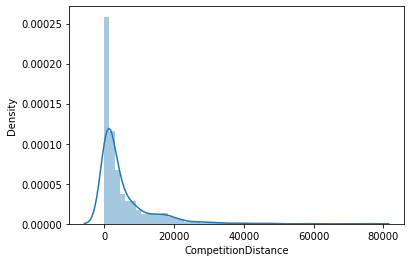

In [ ]:
#find distribution the dataset
sns.distplot(df_store['CompetitionDistance'])

<font color = "sky blue"><h3>**Observation:**</h3>

*    Maximum Values of the Data lies on the left side of the plot with almost a flat line towars right i.e. the data is <font color = "sky blue">**right skewed**.</font>
*   So, the <font color = "sky blue">**Median values will be used to fill the missing values**.</font>



In [ ]:
#check if promo2 is open and week and year are missing
df_store[(df_store['Promo2'] == 1) & (df_store['Promo2SinceYear'].isnull())].count()
print('\n------')
df_store[(df_store['Promo2'] == 1) & (df_store['Promo2SinceWeek'].isnull())].count()

Store                        0
StoreType                    0
Assortment                   0
CompetitionDistance          0
CompetitionOpenSinceMonth    0
CompetitionOpenSinceYear     0
Promo2                       0
Promo2SinceWeek              0
Promo2SinceYear              0
PromoInterval                0
dtype: int64


------


Store                        0
StoreType                    0
Assortment                   0
CompetitionDistance          0
CompetitionOpenSinceMonth    0
CompetitionOpenSinceYear     0
Promo2                       0
Promo2SinceWeek              0
Promo2SinceYear              0
PromoInterval                0
dtype: int64

In [ ]:
# filling competition distance with the median value
df_store['CompetitionDistance'].fillna(df_store['CompetitionDistance'].median(), inplace = True)

In [ ]:
# checking if competition dicsance is zero bt error. 
df_store[(df_store['CompetitionDistance'] == 0.0)].shape[0] / 1115

0.0

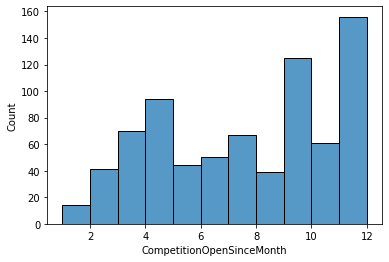

In [ ]:
sns.histplot(df_store['CompetitionOpenSinceMonth'].sort_values())

In [ ]:
df_store['CompetitionOpenSinceMonth'].unique()

array([ 9., 11., 12.,  4., 10.,  8., nan,  3.,  6.,  5.,  1.,  2.,  7.])



*   <font color = "sky blue">**CompetitionOpenSinceMonth:**</font> As the dataset contains only 12 values of the month the <font color = "sky blue">**Mode Value will be used to fill the missing values.**</font>
*  <font color = "sky blue">**CompetitionOpenSinceYear:**</font>As the dataset contains values of the year the <font color = "sky blue">**Mode Value will be used to fill the missing values.**







In [ ]:
#find mode of the 2 columns
val1,val2 = df_store['CompetitionOpenSinceMonth'].mode()[0],df_store['CompetitionOpenSinceYear'].mode()[0]
print(f'Mode for CompetitionOpenSinceMonth: {val1} \nMode for CompetitionOpenSinceYear: {val2}  ')

Mode for CompetitionOpenSinceMonth: 9.0 
Mode for CompetitionOpenSinceYear: 2013.0  


In [ ]:
# filling competition open since month and year with modes of those columns
df_store['CompetitionOpenSinceMonth'].fillna(val1, inplace = True)
df_store['CompetitionOpenSinceYear'].fillna(val2, inplace = True)

When the promo2 is zero the Promo2SinceWeek,Promo2SinceYear, PromoInterval can be seen to be NaN.<br>
<font color = "sky blue">**Therefore, replacing NaN values with 0.**

In [ ]:
# inputing the nan values of promo2 related columns with 0
df_store['Promo2SinceWeek'].fillna(value=0,inplace=True)
df_store['Promo2SinceYear'].fillna(value=0,inplace=True)
df_store['PromoInterval'].fillna(value=0,inplace=True)     

In [ ]:
#check
df_store.isnull().sum()

Store                        0
StoreType                    0
Assortment                   0
CompetitionDistance          0
CompetitionOpenSinceMonth    0
CompetitionOpenSinceYear     0
Promo2                       0
Promo2SinceWeek              0
Promo2SinceYear              0
PromoInterval                0
dtype: int64

<hr color="grey">

##  <font color = "sky blue">**Mergeing the two DataFrames**

In [ ]:
#merging the store data on rossmann using right join on store column
df_rms = pd.merge(df_rossmann,df_store, how='inner', on = 'Store') #rms = rossmann Stores

In [ ]:
print('------------------------------------Head---------------------------------------\n')
df_rms.head()               #checking 1st 5 rows of the df
print('\n------------------------------------Tail---------------------------------------\n')
df_rms.tail()               #checking last 5 rows of the df
print('\n------------------------------------Shape-------------------------------------\n')
                            #no. of rows and columns
print(f'Rows: {df_rms.shape[0]}, Columns: {df_rms.shape[1]}\n')

------------------------------------Head---------------------------------------



,Store,DayOfWeek,Date,Sales,Customers,Open,Promo,StateHoliday,SchoolHoliday,StoreType,Assortment,CompetitionDistance,CompetitionOpenSinceMonth,CompetitionOpenSinceYear,Promo2,Promo2SinceWeek,Promo2SinceYear,PromoInterval
0,1,5,2015-07-31,5263,555,1,1,0,1,c,a,1270.0,9.0,2008.0,0,0.0,0.0,0
1,1,4,2015-07-30,5020,546,1,1,0,1,c,a,1270.0,9.0,2008.0,0,0.0,0.0,0
2,1,3,2015-07-29,4782,523,1,1,0,1,c,a,1270.0,9.0,2008.0,0,0.0,0.0,0
3,1,2,2015-07-28,5011,560,1,1,0,1,c,a,1270.0,9.0,2008.0,0,0.0,0.0,0
4,1,1,2015-07-27,6102,612,1,1,0,1,c,a,1270.0,9.0,2008.0,0,0.0,0.0,0



------------------------------------Tail---------------------------------------



,Store,DayOfWeek,Date,Sales,Customers,Open,Promo,StateHoliday,SchoolHoliday,StoreType,Assortment,CompetitionDistance,CompetitionOpenSinceMonth,CompetitionOpenSinceYear,Promo2,Promo2SinceWeek,Promo2SinceYear,PromoInterval
1017204,1115,6,2013-01-05,4771,339,1,0,0,1,d,c,5350.0,9.0,2013.0,1,22.0,2012.0,"Mar,Jun,Sept,Dec"
1017205,1115,5,2013-01-04,4540,326,1,0,0,1,d,c,5350.0,9.0,2013.0,1,22.0,2012.0,"Mar,Jun,Sept,Dec"
1017206,1115,4,2013-01-03,4297,300,1,0,0,1,d,c,5350.0,9.0,2013.0,1,22.0,2012.0,"Mar,Jun,Sept,Dec"
1017207,1115,3,2013-01-02,3697,305,1,0,0,1,d,c,5350.0,9.0,2013.0,1,22.0,2012.0,"Mar,Jun,Sept,Dec"
1017208,1115,2,2013-01-01,0,0,0,0,a,1,d,c,5350.0,9.0,2013.0,1,22.0,2012.0,"Mar,Jun,Sept,Dec"



------------------------------------Shape-------------------------------------

Rows: 1017209, Columns: 18



In [ ]:
#Sorting the df in terms of Date and Store 
df_rms.sort_values(by=['Date','Store'],inplace=True,ascending=[False,True])
#reseting the index as sort_values shuffles the rows 
df_rms.reset_index(drop=True, inplace=True)
print('------------------------------------Head---------------------------------------\n')
df_rms.head(10)#first 3 rows of the df
print('\n------------------------------------Shape-------------------------------------\n')
                              #no. of rows and columns
print(f'Rows: {df_rms.shape[0]}, Columns: {df_rms.shape[1]}\n') #cheking if any data is missing after the above operations.

------------------------------------Head---------------------------------------



,Store,DayOfWeek,Date,Sales,Customers,Open,Promo,StateHoliday,SchoolHoliday,StoreType,Assortment,CompetitionDistance,CompetitionOpenSinceMonth,CompetitionOpenSinceYear,Promo2,Promo2SinceWeek,Promo2SinceYear,PromoInterval
0,1,5,2015-07-31,5263,555,1,1,0,1,c,a,1270.0,9.0,2008.0,0,0.0,0.0,0
1,2,5,2015-07-31,6064,625,1,1,0,1,a,a,570.0,11.0,2007.0,1,13.0,2010.0,"Jan,Apr,Jul,Oct"
2,3,5,2015-07-31,8314,821,1,1,0,1,a,a,14130.0,12.0,2006.0,1,14.0,2011.0,"Jan,Apr,Jul,Oct"
3,4,5,2015-07-31,13995,1498,1,1,0,1,c,c,620.0,9.0,2009.0,0,0.0,0.0,0
4,5,5,2015-07-31,4822,559,1,1,0,1,a,a,29910.0,4.0,2015.0,0,0.0,0.0,0
5,6,5,2015-07-31,5651,589,1,1,0,1,a,a,310.0,12.0,2013.0,0,0.0,0.0,0
6,7,5,2015-07-31,15344,1414,1,1,0,1,a,c,24000.0,4.0,2013.0,0,0.0,0.0,0
7,8,5,2015-07-31,8492,833,1,1,0,1,a,a,7520.0,10.0,2014.0,0,0.0,0.0,0
8,9,5,2015-07-31,8565,687,1,1,0,1,a,c,2030.0,8.0,2000.0,0,0.0,0.0,0
9,10,5,2015-07-31,7185,681,1,1,0,1,a,a,3160.0,9.0,2009.0,0,0.0,0.0,0



------------------------------------Shape-------------------------------------

Rows: 1017209, Columns: 18



In [ ]:
#Getting day from the Date column
df_rms['DayOfYear'] = df_rms['Date'].dt.dayofyear
#Getting week from the Date column
df_rms['WeekOfYear'] = df_rms['Date'].dt.weekofyear
#Getting month from the Date column
df_rms['Month'] = df_rms['Date'].dt.month
#Getting year from the Date column
df_rms['Year'] = df_rms['Date'].dt.year

Now in Assortment column we have to levelized the catagorical value in a form of 0,1,2 which we give some weightage to model predictions.

In [ ]:
df_rms['Assortment'].value_counts()

a    537445
c    471470
b      8294
Name: Assortment, dtype: int64

Now in StoreType we did not use One hot encoding because if we done hone encoding which give equal weightage to our model. so as per domain knowledge we can labeled as 0,1,2,3 as store type.

store_type 0 means small store_type.

store_type 1 means medium store_type.

store_type 2 means large store_type.

store_type 3 means huge store_type.

In [ ]:
df_rms['StoreType'].value_counts()

a    551627
d    312912
c    136840
b     15830
Name: StoreType, dtype: int64

In [ ]:
df_rms['StateHoliday'].value_counts()

0    986159
a     20260
b      6690
c      4100
Name: StateHoliday, dtype: int64

In [ ]:
# code for changing Assortment dtype from object to int.
df_rms['Assortment'] = df_rms['Assortment'].map({'a': 0, "b": 1, "c": 2})
#converting catagorical value into interger values based on store type class.
df_rms['StoreType'] = df_rms['StoreType'].map({'a': 0, "b": 1, "c": 2, "d": 3})
##converting catagorical value into interger values based on StateHoliday class.
df_rms["StateHoliday"] = df_rms["StateHoliday"].map({0: 0, "0": 0, "a": 1, "b": 1, "c": 1})


In [ ]:
df_rms.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1017209 entries, 0 to 1017208
Data columns (total 22 columns):
 #   Column                     Non-Null Count    Dtype         
---  ------                     --------------    -----         
 0   Store                      1017209 non-null  int64         
 1   DayOfWeek                  1017209 non-null  int64         
 2   Date                       1017209 non-null  datetime64[ns]
 3   Sales                      1017209 non-null  int64         
 4   Customers                  1017209 non-null  int64         
 5   Open                       1017209 non-null  int64         
 6   Promo                      1017209 non-null  int64         
 7   StateHoliday               1017209 non-null  int64         
 8   SchoolHoliday              1017209 non-null  int64         
 9   StoreType                  1017209 non-null  int64         
 10  Assortment                 1017209 non-null  int64         
 11  CompetitionDistance        1017209 no

In [ ]:
#converting object dtype to integer.
df_rms['Date'] = df_rms['Date'].astype(int) #convert in int Dtype
df_rms['StoreType']= df_rms['StoreType'].astype(int)
df_rms['Assortment']= df_rms['Assortment'].astype(int)
df_rms['StateHoliday']= df_rms['StoreType'].astype(int)

##<font color = "sky blue">**EDA**

heatmap<br>
promos vs sales<br>
sales vs holidays<br>
weekdays vs weekends<br>
sales on diff days of week<br>
monthly sales✅ <br> 
yearly sales ✅ <br> 
customers sales<br>
CompetitionOpenSinceMonth sales comparision<br>


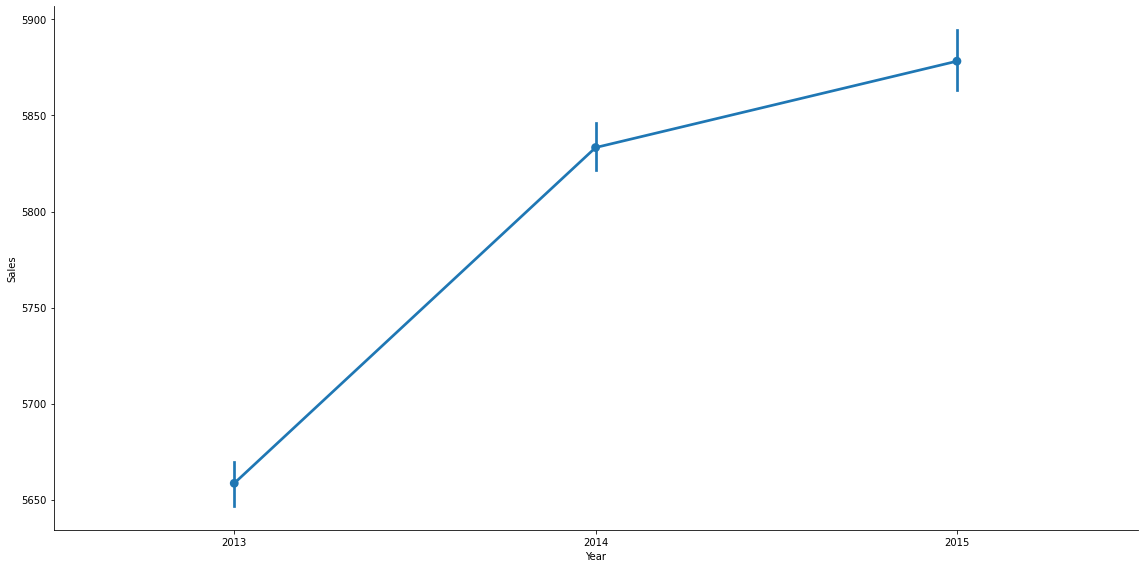

In [ ]:
#Yearly sales combined
sns.catplot( data=df_rms,x="Year", y="Sales", kind="point",size=8,aspect=2)

### <font color = "sky blue">**Observation:**


*   frequencies of sales increases YoY.




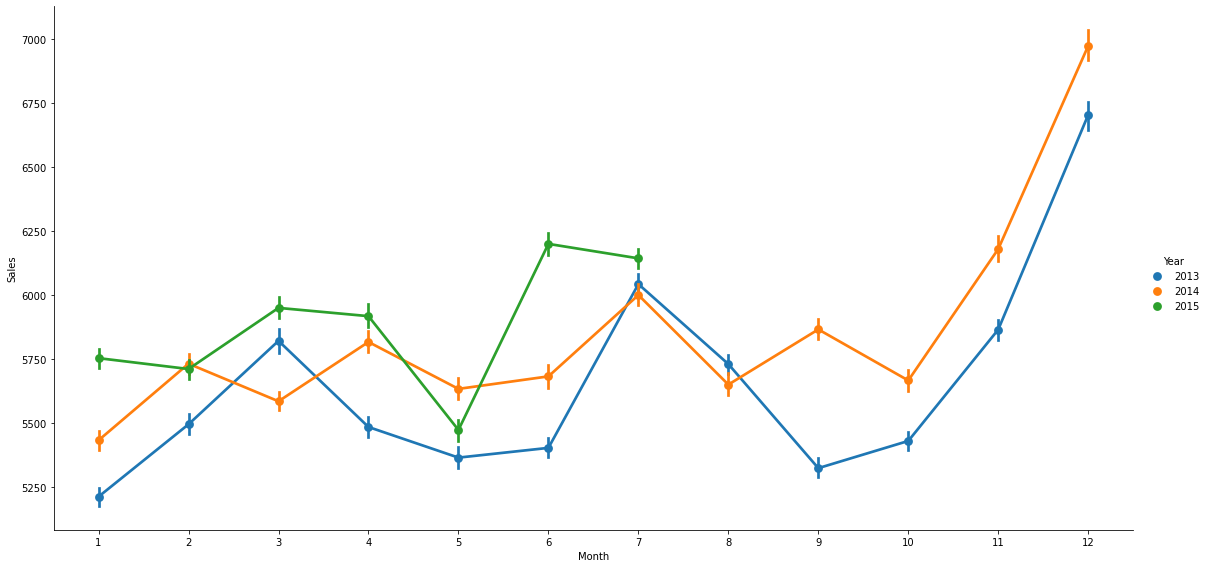

In [ ]:
#monthly sales of every year
sns.catplot( data=df_rms,x="Month", y="Sales", hue="Year", style="Year",kind="point",size=8,aspect=2)

###<font color = "Sky blue">**Obesrvation**:


*   Here the  trend shows that the sales increase significantly in the month of October to December due to the holiday season.
*   From the chart we can see that there Are roughly 3 cycle of sales.



[Text(0.5, 1.0, 'Sales according to year ')]

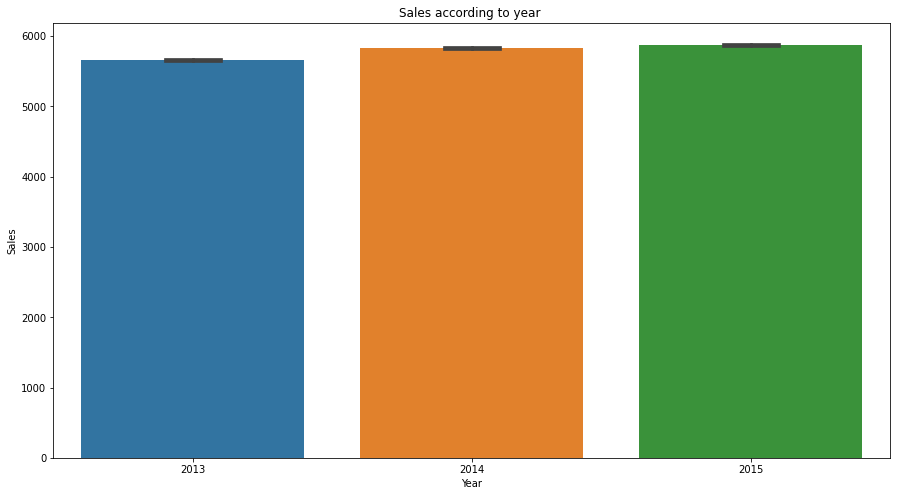

In [ ]:
#anlysis of data by vizualisation
fig,ax=plt.subplots(figsize=(15,8))
sns.barplot(data=df_rms,x='Year',y='Sales',ax=ax,capsize=.2)
ax.set(title='Sales according to year ')
plt.show()


### <font color = "sky blue">**Observation:**

*   From above chart we can see that there is YoY increase in sales from 2013-2015

* Despite having data available for  7 months in year 2015.It has already crossed the sales of 2014.   





### <font color = "sky blue">Week day sales

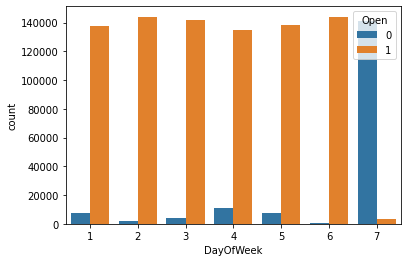

In [ ]:
sns.countplot(x='DayOfWeek',hue='Open',data= df_rms)

### <font color = "sky blue">**Observation:**


*   This plot shows open and close of the shop on days of the week.
*   Here, the store in open for maximum no. of days on Saturday and minimum no. of days Sunday. 



[Text(0.5, 1.0, 'Sales according to Day of week ')]

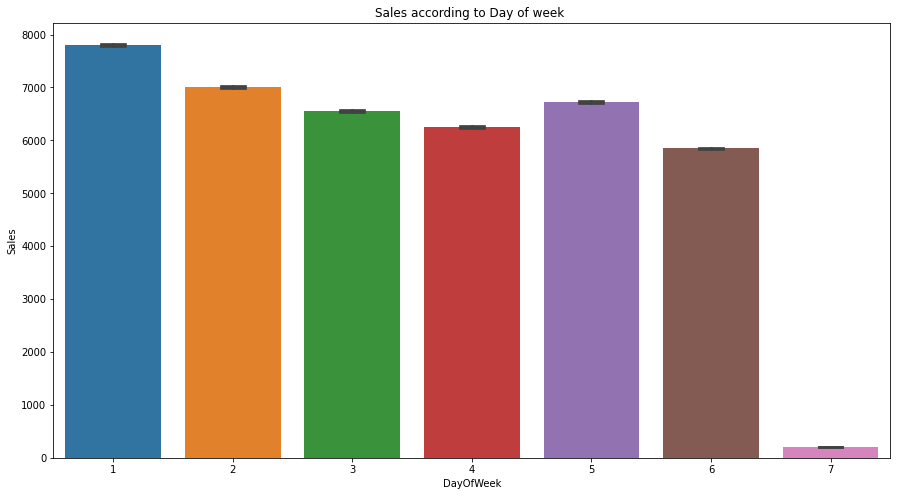

In [ ]:

#anlysis of data by vizualisation
fig,ax=plt.subplots(figsize=(15,8))
sns.barplot(data=df_rms,x='DayOfWeek',y='Sales',ax=ax,capsize=.2)
ax.set(title='Sales according to Day of week ')
plt.show()

### <font color = "sky blue">**Observation:**


*   As sundays has the most store closed so it has the least number of sales
*   On the other hand mondays have the maximum number of sales
*   Despite having the maximum number of stores open still have  third least sales numbers.








In [ ]:
#customers sales
# sns.barplot(data = df_rms, x="island", y="body_mass_g", hue="sex")

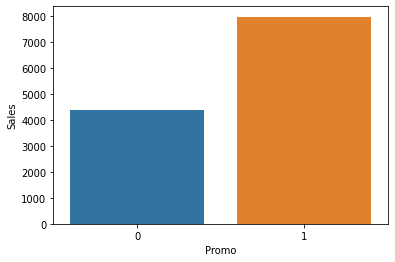

In [ ]:
#Impact of promo on sales
Promo_sales = pd.DataFrame(df_rms.groupby('Promo').agg({'Sales':'mean'}))
sns.barplot(x=Promo_sales.index, y = Promo_sales['Sales'])

### <font color = "sky blue">**Observation:**

*   The Sales get almost increases by 100 % when promo takes place




([<matplotlib.patches.Wedge at 0x7f40f51e85b0>,
 [Text(1.0159180704524655, -0.6386786939675845, 'Not-Affected'),
  Text(-0.9312582038409442, 0.5854555130656288, 'Affected')],
 [Text(0.5926188744306049, -0.37256257148109095, '82.1%'),
  Text(-0.5079590202768786, 0.31933937076307023, '17.9%')])

(-1.1045085311776077,
 1.1946791547298579,
 -1.1573233397609766,
 1.0528563411165743)

Text(0.5, 1.0, 'Sales Affected by Schoolholiday or Not ?')

[]

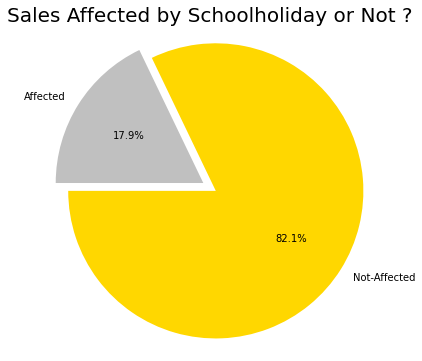

In [ ]:
labels = 'Not-Affected' , 'Affected'
sizes = df_rms['SchoolHoliday'].value_counts()
colors = ['gold', 'silver']
explode = (0.1, 0.0)
plt.pie(sizes, explode=explode, labels=labels, colors=colors,
        autopct='%1.1f%%', startangle=180)
plt.axis('equal')
plt.title("Sales Affected by Schoolholiday or Not ?",fontsize=20)
plt.plot()
fig=plt.gcf()
fig.set_size_inches(6,6)
plt.show()

### <font color = "sky blue">**Observation:**




*   Only 18% Sales are affected during school holiday






In [ ]:
#linear relation between sales and customers
# sns.lmplot(x= 'Sales' , y ='Customers',data=df_rms, palette='seismic', height=5,aspect=1, line_kws={'color':'blue'})

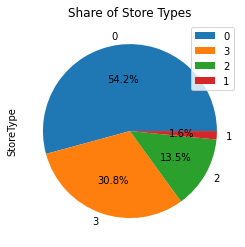

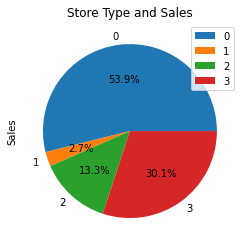

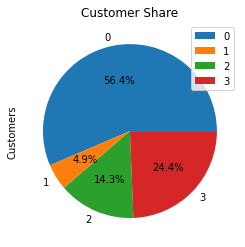

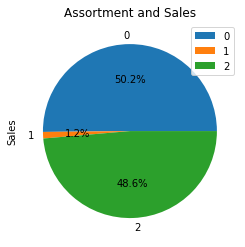

In [ ]:
#store types in all of the dataset
plt1 = df_rms["StoreType"].value_counts()
plt1.plot.pie(title='Share of Store Types', legend=True, autopct='%1.1f%%')
plt.show()

#store type and sales
plt2 = df_rms.groupby("StoreType")["Sales"].sum()
plt2.plot.pie(title='Store Type and Sales', legend=True, autopct='%1.1f%%')
plt.show()

#customers and store type
plt3 = df_rms.groupby("StoreType")["Customers"].sum()
plt3.plot.pie(title='Customer Share', legend=True, autopct='%1.1f%%')
plt.show()

#Assortment and Sales
plt4 = df_rms.groupby("Assortment")["Sales"].sum()
plt4.plot.pie(title='Assortment and Sales', legend=True, autopct='%1.1f%%')
plt.show()

# plt5 = df_rms.groupby("StoreType")["Assortment"].count()
# plt5.plot.pie(title='Customer Share', legend=True, autopct='%1.1f%%')
# plt.show()


### <font color = "sky blue">**Observation:**

*   Maximum sales are from store a i.e. <font color = "sky blue">**54%**</font>
*   Minimum sales are from store d i.e. <font color = "sky blue">**1.5%**</font>



Text(-0.25, 346389.0, '\n346389.0')

Text(0.75, 6594.0, '\n6594.0')

Text(1.75, 70878.0, '\n70878.0')

Text(2.75, 113584.0, '\n113584.0')

Text(0.016666666666666663, nan, '\nnan')

Text(1.0166666666666666, 8294.0, '\n8294.0')

Text(2.0166666666666666, nan, '\nnan')

Text(3.0166666666666666, nan, '\nnan')

Text(0.2833333333333333, 205238.0, '\n205238.0')

Text(1.2833333333333332, 942.0, '\n942.0')

Text(2.283333333333333, 65962.0, '\n65962.0')

Text(3.283333333333333, 199328.0, '\n199328.0')

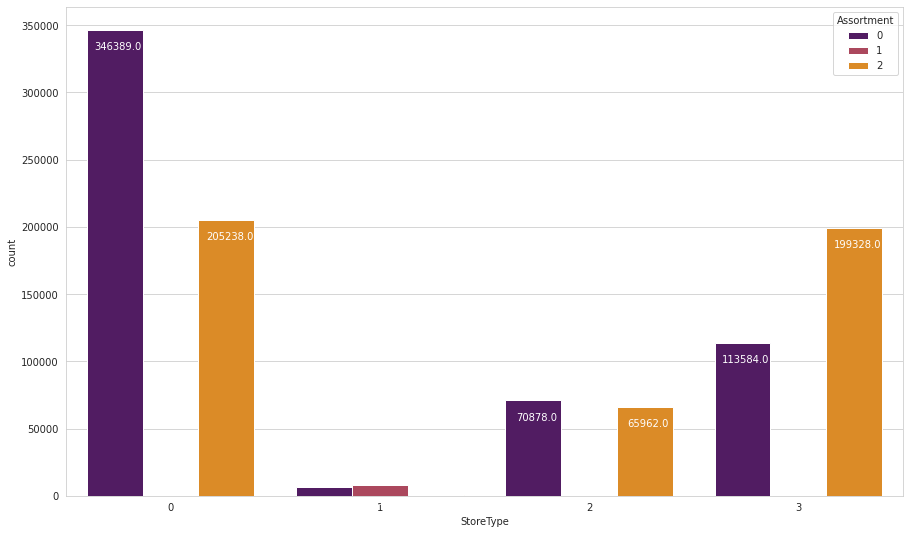

In [ ]:

#checking stores with their assortment type 
sns.set_style("whitegrid")
fig, ax = plt.subplots()
fig.set_size_inches(15, 9)
store_type=sns.countplot(x='StoreType',hue='Assortment', data=df_rms,palette="inferno")

for p in store_type.patches:
    store_type.annotate(f'\n{p.get_height()}', (p.get_x()+0.15, p.get_height()),ha='center', va='top', color='white', size=10)

In [ ]:
numeric_features = list(df_rms.describe().columns)


<Figure size 720x576 with 0 Axes>

Text(0.5, 1.0, 'Scatter plot b/w "Customers" and "Sales"')

Text(0.5, 0, 'Customers')

Text(0, 0.5, 'Sales')

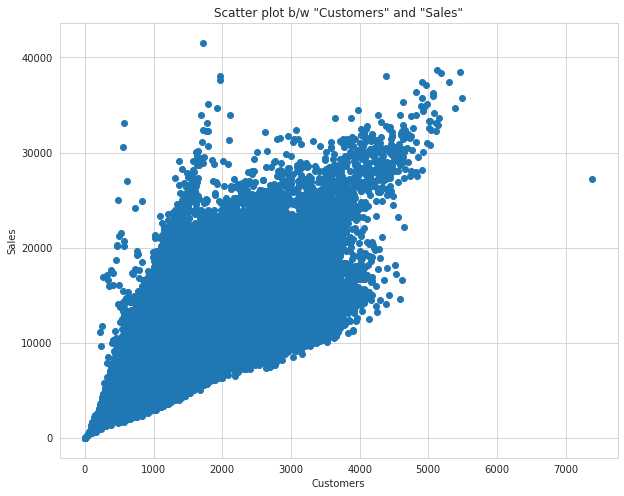

In [ ]:
#scatterplot of Customers and Sales
plt.figure(figsize = (10,8))
x = df_rms['Customers']
y = df_rms['Sales']
plt.scatter(x,y)
plt.title('Scatter plot b/w "Customers" and "Sales"')
plt.xlabel('Customers')
plt.ylabel('Sales')

### <font color = "sky blue">**Observation:**

*   Positive relation between no. of Customers and Sales.
*   Linear regression with high varience & few outliers.



<Figure size 720x576 with 0 Axes>

Text(0.5, 1.0, 'Scatter plot b/w "CompetitionDistance" and "Sales"')

Text(0.5, 0, 'CompetitionDistance')

Text(0, 0.5, 'Sales')

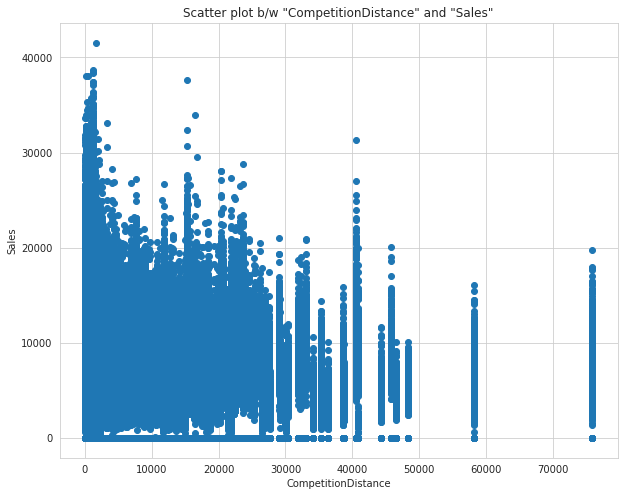

In [ ]:
#scatterplot of Competition Distance and Sales

plt.figure(figsize = (10,8))
x = df_rms['CompetitionDistance']
y = df_rms['Sales']
plt.scatter(x,y)
plt.title('Scatter plot b/w "CompetitionDistance" and "Sales"')
plt.xlabel('CompetitionDistance')
plt.ylabel('Sales')

### <font color = "sky blue">**Observation:**


*   As the distance between the competition increases the sales decreases.
*   After certain distance (30,000) correlation between CompetitionDistance and Sales is very vague.

In [ ]:
df_rms[df_rms['CompetitionOpenSinceYear'] == 1900].shape[0]
df_rms[df_rms['CompetitionOpenSinceYear'] == 1960].shape[0]

758

0

Store type B though being few in number had the highest sales average. The reasons include all three kinds of assortments specially assortment level b which is only available at type b stores and being open on sundays as well.

<Figure size 1152x648 with 0 Axes>

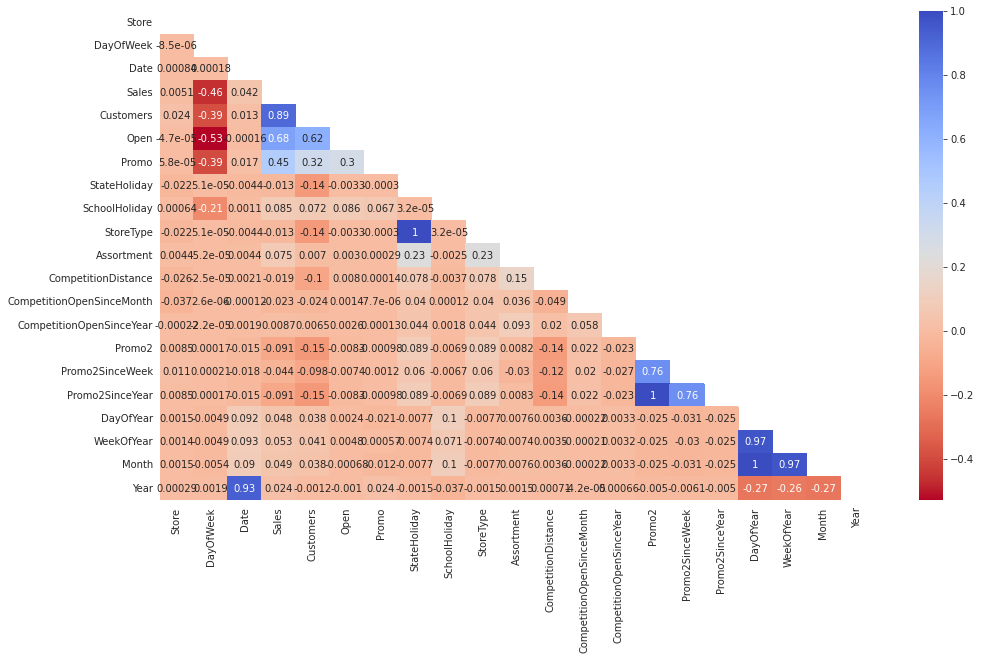

In [ ]:
plt.figure(figsize=(16,9))
mask = np.triu(np.ones_like(df_rms.corr()))
sns.heatmap(df_rms.corr(),annot= True, cmap='coolwarm_r', mask = mask)

### <font color="sky blue">**Possitive Correlation**</font>
Customers and sales has the most positive correlation of **0.84**<br>
Followed by open and Sales with correlation of **0.68**
### <font color="sky blue">**Negative Correlation**</font>
Open and Days of week has most negative correlation of **-0.53**

In [ ]:
df_rms.head()
df_rms.info()

,Store,DayOfWeek,Date,Sales,Customers,Open,Promo,StateHoliday,SchoolHoliday,StoreType,Assortment,CompetitionDistance,CompetitionOpenSinceMonth,CompetitionOpenSinceYear,Promo2,Promo2SinceWeek,Promo2SinceYear,PromoInterval,DayOfYear,WeekOfYear,Month,Year
0,1,5,1438300800000000000,5263,555,1,1,2,1,2,0,1270.0,9.0,2008.0,0,0.0,0.0,0,212,31,7,2015
1,2,5,1438300800000000000,6064,625,1,1,0,1,0,0,570.0,11.0,2007.0,1,13.0,2010.0,"Jan,Apr,Jul,Oct",212,31,7,2015
2,3,5,1438300800000000000,8314,821,1,1,0,1,0,0,14130.0,12.0,2006.0,1,14.0,2011.0,"Jan,Apr,Jul,Oct",212,31,7,2015
3,4,5,1438300800000000000,13995,1498,1,1,2,1,2,2,620.0,9.0,2009.0,0,0.0,0.0,0,212,31,7,2015
4,5,5,1438300800000000000,4822,559,1,1,0,1,0,0,29910.0,4.0,2015.0,0,0.0,0.0,0,212,31,7,2015


<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1017209 entries, 0 to 1017208
Data columns (total 22 columns):
 #   Column                     Non-Null Count    Dtype  
---  ------                     --------------    -----  
 0   Store                      1017209 non-null  int64  
 1   DayOfWeek                  1017209 non-null  int64  
 2   Date                       1017209 non-null  int64  
 3   Sales                      1017209 non-null  int64  
 4   Customers                  1017209 non-null  int64  
 5   Open                       1017209 non-null  int64  
 6   Promo                      1017209 non-null  int64  
 7   StateHoliday               1017209 non-null  int64  
 8   SchoolHoliday              1017209 non-null  int64  
 9   StoreType                  1017209 non-null  int64  
 10  Assortment                 1017209 non-null  int64  
 11  CompetitionDistance        1017209 non-null  float64
 12  CompetitionOpenSinceMonth  1017209 non-null  float64
 13  CompetitionO

In [ ]:
# Select all object columns
object_columns = df_rms.select_dtypes(['object'])

# Drop the object columns from the DataFrame
df_s = df_rms.drop(object_columns, axis=1)

# Drop more columns
# df_s.drop(['SchoolHoliday','CompetitionOpenSinceMonth',	'CompetitionOpenSinceYear','Promo2SinceWeek','Promo2SinceYear','DayOfYear','WeekOfYear','Month','Year','DayOfWeek','Date'], inplace = True, axis = 1)

In [ ]:
df_s.head()

,Store,DayOfWeek,Date,Sales,Customers,Open,Promo,StateHoliday,SchoolHoliday,StoreType,Assortment,CompetitionDistance,CompetitionOpenSinceMonth,CompetitionOpenSinceYear,Promo2,Promo2SinceWeek,Promo2SinceYear,DayOfYear,WeekOfYear,Month,Year
0,1,5,1438300800000000000,5263,555,1,1,2,1,2,0,1270.0,9.0,2008.0,0,0.0,0.0,212,31,7,2015
1,2,5,1438300800000000000,6064,625,1,1,0,1,0,0,570.0,11.0,2007.0,1,13.0,2010.0,212,31,7,2015
2,3,5,1438300800000000000,8314,821,1,1,0,1,0,0,14130.0,12.0,2006.0,1,14.0,2011.0,212,31,7,2015
3,4,5,1438300800000000000,13995,1498,1,1,2,1,2,2,620.0,9.0,2009.0,0,0.0,0.0,212,31,7,2015
4,5,5,1438300800000000000,4822,559,1,1,0,1,0,0,29910.0,4.0,2015.0,0,0.0,0.0,212,31,7,2015


As the code takes time to execute we have put the photo of the plot with the code given below

In [ ]:
#pairplot for store dataset
# sns.set_style("whitegrid", {'axes.grid' : False})
# pp=sns.pairplot(df_s[['Sales','Customers','Year','CompetitionDistance','CompetitionOpenSinceMonth','CompetitionOpenSinceYear']].sample(10000),hue='Sales')
# pp.fig.set_size_inches(15,15)

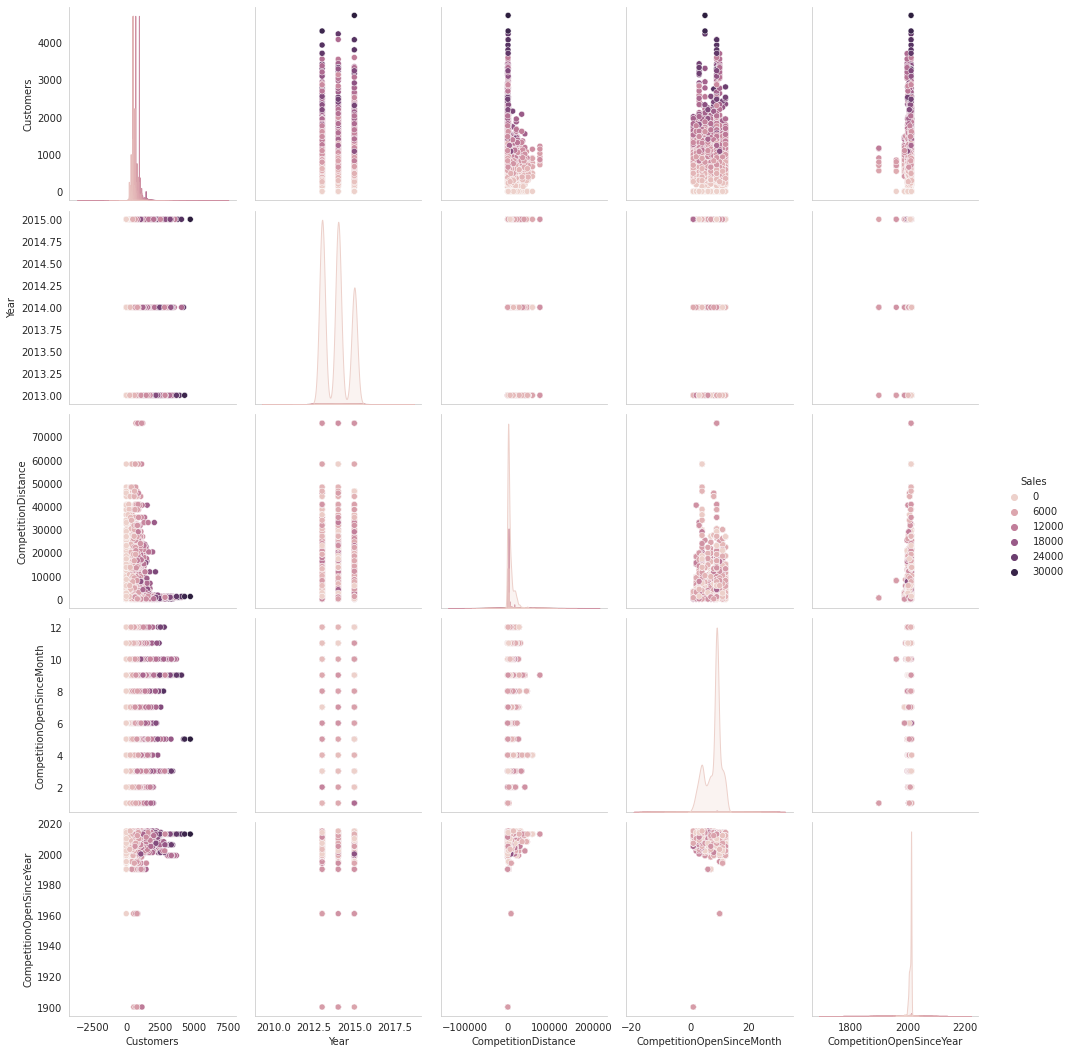

Multicollinearity Test<br>
Create a dummy variable -pd.getdummies
<br>
train and test split<br>
ml model on train data sets<br>
basic model on prediction of sales with every column<br>
Multicollinearity Test<br>

## <font color = "sky blue">**Check Multicolinerity**

In [ ]:
df_rms.head()

,Store,DayOfWeek,Date,Sales,Customers,Open,Promo,StateHoliday,SchoolHoliday,StoreType,Assortment,CompetitionDistance,CompetitionOpenSinceMonth,CompetitionOpenSinceYear,Promo2,Promo2SinceWeek,Promo2SinceYear,PromoInterval,DayOfYear,WeekOfYear,Month,Year
0,1,5,1438300800000000000,5263,555,1,1,2,1,2,0,1270.0,9.0,2008.0,0,0.0,0.0,0,212,31,7,2015
1,2,5,1438300800000000000,6064,625,1,1,0,1,0,0,570.0,11.0,2007.0,1,13.0,2010.0,"Jan,Apr,Jul,Oct",212,31,7,2015
2,3,5,1438300800000000000,8314,821,1,1,0,1,0,0,14130.0,12.0,2006.0,1,14.0,2011.0,"Jan,Apr,Jul,Oct",212,31,7,2015
3,4,5,1438300800000000000,13995,1498,1,1,2,1,2,2,620.0,9.0,2009.0,0,0.0,0.0,0,212,31,7,2015
4,5,5,1438300800000000000,4822,559,1,1,0,1,0,0,29910.0,4.0,2015.0,0,0.0,0.0,0,212,31,7,2015


In [ ]:
def calc_vif(X):

    # Calculating VIF
    vif = pd.DataFrame()
    vif["variables"] = X.columns
    vif["VIF"] = [variance_inflation_factor(X.values, i) for i in range(X.shape[1])]
    vif = vif.sort_values(by = 'VIF', ascending = False)

    return(vif)

In [ ]:
calc_vif(df_rms[[i for i in df_rms.describe().columns if i not in ['Store','Sales','Open']]])

,variables,VIF
1,Date,3738.155855
7,Assortment,1.021844
11,Promo2,1.019524
13,Promo2SinceYear,1.018856
12,Promo2SinceWeek,1.015052
2,Customers,1.010542
4,StateHoliday,1.005682
6,StoreType,1.005682
16,Month,1.004531
15,WeekOfYear,1.004434


In [ ]:
df_rms.drop(['CompetitionOpenSinceMonth','CompetitionOpenSinceYear','Promo2SinceWeek','Promo2SinceYear','Date','PromoInterval'], axis = 1, inplace = True)

In [ ]:
calc_vif(df_rms[[i for i in df_rms.describe().columns if i not in ['Store','Sales','Open']]])

,variables,VIF
3,StateHoliday,inf
5,StoreType,inf
11,Month,558.965205
9,DayOfYear,509.686751
10,WeekOfYear,61.050760
12,Year,22.970967
0,DayOfWeek,6.800968
1,Customers,3.750034
8,Promo2,2.127286
6,Assortment,2.037344


### <font color = "sky blue"><b>Creating Dummy variables</b>

In [ ]:
df_dummy = pd.get_dummies(data = df_rms, columns = ['DayOfWeek','StoreType',	'Assortment'], drop_first = True)

In [ ]:
df_dummy.head()
df_dummy.info()
df_dummy.shape[0], df_dummy.shape[1]

,Store,Sales,Customers,Open,Promo,StateHoliday,SchoolHoliday,CompetitionDistance,Promo2,DayOfYear,WeekOfYear,Month,Year,DayOfWeek_2,DayOfWeek_3,DayOfWeek_4,DayOfWeek_5,DayOfWeek_6,DayOfWeek_7,StoreType_1,StoreType_2,StoreType_3,Assortment_1,Assortment_2
0,1,5263,555,1,1,2,1,1270.0,0,212,31,7,2015,0,0,0,1,0,0,0,1,0,0,0
1,2,6064,625,1,1,0,1,570.0,1,212,31,7,2015,0,0,0,1,0,0,0,0,0,0,0
2,3,8314,821,1,1,0,1,14130.0,1,212,31,7,2015,0,0,0,1,0,0,0,0,0,0,0
3,4,13995,1498,1,1,2,1,620.0,0,212,31,7,2015,0,0,0,1,0,0,0,1,0,0,1
4,5,4822,559,1,1,0,1,29910.0,0,212,31,7,2015,0,0,0,1,0,0,0,0,0,0,0


<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1017209 entries, 0 to 1017208
Data columns (total 24 columns):
 #   Column               Non-Null Count    Dtype  
---  ------               --------------    -----  
 0   Store                1017209 non-null  int64  
 1   Sales                1017209 non-null  int64  
 2   Customers            1017209 non-null  int64  
 3   Open                 1017209 non-null  int64  
 4   Promo                1017209 non-null  int64  
 5   StateHoliday         1017209 non-null  int64  
 6   SchoolHoliday        1017209 non-null  int64  
 7   CompetitionDistance  1017209 non-null  float64
 8   Promo2               1017209 non-null  int64  
 9   DayOfYear            1017209 non-null  int64  
 10  WeekOfYear           1017209 non-null  int64  
 11  Month                1017209 non-null  int64  
 12  Year                 1017209 non-null  int64  
 13  DayOfWeek_2          1017209 non-null  uint8  
 14  DayOfWeek_3          1017209 non-null  uint8  
 15

(1017209, 24)

In [ ]:
# scaler = MinMaxScaler()  # instantiating a MinMaxScaler object 

In [ ]:
df_rms['StateHoliday'].unique()

array([2, 0, 3, 1])

In [ ]:
df_rms.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1017209 entries, 0 to 1017208
Data columns (total 16 columns):
 #   Column               Non-Null Count    Dtype  
---  ------               --------------    -----  
 0   Store                1017209 non-null  int64  
 1   DayOfWeek            1017209 non-null  int64  
 2   Sales                1017209 non-null  int64  
 3   Customers            1017209 non-null  int64  
 4   Open                 1017209 non-null  int64  
 5   Promo                1017209 non-null  int64  
 6   StateHoliday         1017209 non-null  int64  
 7   SchoolHoliday        1017209 non-null  int64  
 8   StoreType            1017209 non-null  int64  
 9   Assortment           1017209 non-null  int64  
 10  CompetitionDistance  1017209 non-null  float64
 11  Promo2               1017209 non-null  int64  
 12  DayOfYear            1017209 non-null  int64  
 13  WeekOfYear           1017209 non-null  int64  
 14  Month                1017209 non-null  int64  
 15

### <font color = "sky blue"><b>Splitting the Data into Training and Testing Sets</b>

for now splitting data randomly and do the ml if output not proper than we will split it in time duration.

In [ ]:
df_train, df_test = train_test_split(df_rms, train_size = 0.8, random_state = 100)

In [ ]:
df_train.shape, df_test.shape

((813767, 16), (203442, 16))

traning data without rescalling

In [ ]:
def linear_model(X):
    X_train_lm = sm.add_constant(X)
    lr = sm.OLS(y_train, X_train_lm)
    lr_model = lr.fit()
    print(lr_model.summary())



In [ ]:
#X and y split for train and test 
X_train = df_train.drop('Sales',axis=1)
y_train = df_train[['Sales']]
X_test = df_test.drop('Sales',axis=1)
y_test = df_test[['Sales']]
print(f'The shape of X_train is: {X_train.shape}')
print(f'The shape of y_train is: {y_train.shape}')
print(f'The shape of X_test is: {X_test.shape}')
print(f'The shape of y_test is: {y_test.shape}')

The shape of X_train is: (813767, 15)
The shape of y_train is: (813767, 1)
The shape of X_test is: (203442, 15)
The shape of y_test is: (203442, 1)


In [ ]:
X_train.head()

,Store,DayOfWeek,Customers,Open,Promo,StateHoliday,SchoolHoliday,StoreType,Assortment,CompetitionDistance,Promo2,DayOfYear,WeekOfYear,Month,Year
159073,744,3,709,1,0,0,0,0,0,1370.0,1,70,11,3,2015
942545,41,5,353,1,1,3,0,3,2,1180.0,1,67,10,3,2013
399384,376,4,879,1,0,0,1,0,0,160.0,0,191,28,7,2014
513043,929,6,547,1,0,0,0,0,2,4820.0,0,88,13,3,2014
30918,814,6,502,1,0,3,0,3,2,24530.0,0,185,27,7,2015


In [ ]:
# Transforming data
scaler = MinMaxScaler()
X_train = scaler.fit_transform(X_train)
X_test = scaler.transform(X_test)

## <font color = "sky blue">**1) Linear Regression**

In [ ]:
# Fitting Multiple Linear Regression to the Training set
regressor = LinearRegression()
regressor.fit(X_train, y_train)

LinearRegression()

In [ ]:
linear_model(X_train)

                            OLS Regression Results                            
Dep. Variable:                  Sales   R-squared:                       0.867
Model:                            OLS   Adj. R-squared:                  0.867
Method:                 Least Squares   F-statistic:                 3.798e+05
Date:                Thu, 15 Dec 2022   Prob (F-statistic):               0.00
Time:                        14:46:32   Log-Likelihood:            -7.0519e+06
No. Observations:              813767   AIC:                         1.410e+07
Df Residuals:                  813752   BIC:                         1.410e+07
Df Model:                          14                                         
Covariance Type:            nonrobust                                         
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
const       -680.9004      8.600    -79.173      0.0

In [ ]:
X_train = pd.DataFrame(X_train)

In [ ]:
#Multicollinearity

def calc_vif(X):

    # Calculating VIF
    vif = pd.DataFrame()
    vif["variables"] = X.columns
    vif["VIF"] = [variance_inflation_factor(X.values, i) for i in range(X.shape[1])]

    return(vif)

In [ ]:
calc_vif(df_rms[[i for i in df_rms.describe().columns if i not in ['Store','Sales','Open']]])

,variables,VIF
0,DayOfWeek,6.800968
1,Customers,3.750034
2,Promo,2.034245
3,StateHoliday,inf
4,SchoolHoliday,1.306546
5,StoreType,inf
6,Assortment,2.037344
7,CompetitionDistance,1.593918
8,Promo2,2.127286
9,DayOfYear,509.686751


In [ ]:
# VIF_calculator(df_rms[[i for i in df_rms.describe().columns if i not in ['Store','Sales','Open']]])

In [ ]:
# X_train.drop(10)

In [ ]:
regressor.intercept_

array([-680.82434992])

In [ ]:
regressor.coef_

array([[-1.48036301e+02, -3.23421931e+02,  4.66550943e+04,
         1.51057566e+03,  1.24515641e+03, -4.69945060e+14,
        -2.70857556e+00,  4.69945060e+14,  3.31322625e+02,
         1.84182673e+03,  1.92813966e+02,  6.67684397e+02,
        -1.24673889e+02, -1.13593956e+02,  2.90163879e+02]])

In [ ]:
y_pred_train = regressor.predict(X_train)
y_pred_train

array([[5697.76254357],
       [5382.69603457],
       [6535.40348502],
       ...,
       [4418.30582849],
       [5595.06291525],
       [7142.73850723]])

In [ ]:
# Predicting the Test set results
y_pred = regressor.predict(X_test)

In [ ]:
mean_squared_error(y_test, y_pred)

1984357.6183907902

In [ ]:
# Test performance
math.sqrt(mean_squared_error(y_test, y_pred))

1408.67228921094

In [ ]:
train_score_1=regressor.score(X_train,y_train)
train_score_1


0.8672643118800907

In [ ]:
test_score_1=regressor.score(X_test,y_test)
test_score_1


0.86530496076289

In [ ]:
#storing 100 observations for analysis

simple_lr_pred = pd.DataFrame(y_pred[:100], columns = ['PredictedLR'])
simple_lr_pred['index'] = range(0,100)

simple_lr_real = y_test[:100]
simple_lr_real = simple_lr_real.reset_index()
simple_lr_real.drop(['index'], axis = 1, inplace = True)
simple_lr_real['index'] = range(0,100)
dataset = pd.merge(simple_lr_pred,simple_lr_real, on = 'index',how = 'outer')


In [ ]:
dataset.head()

,PredictedLR,index,Sales
0,8285.014116,0,8839
1,5257.573984,1,5453
2,5629.971166,2,5929
3,8169.384045,3,7176
4,11142.429054,4,16666


In [ ]:

#storing absolute diffrences between actual sales price and predicted
dataset['diff']=(dataset['Sales']-dataset['PredictedLR']).abs()

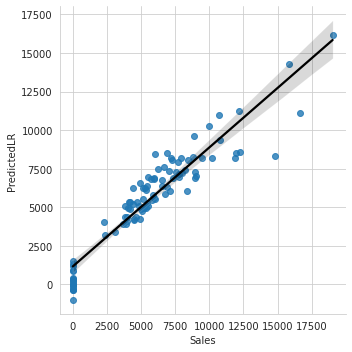

In [ ]:
#visualising our predictions
sns.lmplot(x='Sales', y='PredictedLR', data=dataset, line_kws={'color': 'black'})

In [ ]:
X = sm.add_constant(df_rms) ## let's add an intercept (beta_0) to our model
model = sm.OLS(y, X).fit() ## sm.OLS(output, input)
predictions = model.predict(X)

# Print out the statistics
model.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:                  Sales   R-squared:                       1.000
Model:                            OLS   Adj. R-squared:                  1.000
Method:                 Least Squares   F-statistic:                 5.681e+28
Date:                Thu, 15 Dec 2022   Prob (F-statistic):               0.00
Time:                        14:46:56   Log-Likelihood:             1.8175e+07
No. Observations:             1017209   AIC:                        -3.635e+07
Df Residuals:                 1017193   BIC:                        -3.635e+07
Df Model:                          15                                         
Covariance Type:            nonrobust                                         
=======================================================================================
                          coef    std err          t      P>|t|      [0.025      0.975]
---------------------------------------------------------------------------------------
const                3.263e-09   1.13e-08      0.290      0.772   -1.88e-08    2.53e-08
Store                1.148e-15    1.3e-14      0.089      0.929   -2.43e-14    2.66e-14
DayOfWeek            5.861e-13   2.62e-12      0.223      0.823   -4.56e-12    5.73e-12
Sales                   1.0000   2.97e-15   3.37e+14      0.000       1.000       1.000
Customers            2.265e-15   2.24e-14      0.101      0.919   -4.16e-14    4.61e-14
Open                 6.384e-14   1.63e-11      0.004      0.997   -3.18e-11    3.19e-11
Promo                9.344e-13   1.03e-11      0.091      0.928   -1.93e-11    2.12e-11
StateHoliday         4.854e-14   1.64e-12      0.030      0.976   -3.16e-12    3.26e-12
SchoolHoliday        -3.73e-13   1.13e-11     -0.033      0.974   -2.25e-11    2.17e-11
StoreType            4.971e-14   1.64e-12      0.030      0.976   -3.16e-12    3.26e-12
Assortment           6.395e-14   4.39e-12      0.015      0.988   -8.55e-12    8.67e-12
CompetitionDistance -1.618e-16   5.66e-16     -0.286      0.775   -1.27e-15    9.48e-16
Promo2               4.007e-13   8.66e-12      0.046      0.963   -1.66e-11    1.74e-11
DayOfYear           -3.886e-15   4.93e-13     -0.008      0.994   -9.69e-13    9.61e-13
WeekOfYear           9.098e-14   1.18e-12      0.077      0.938   -2.22e-12     2.4e-12
Month               -8.065e-13   1.47e-11     -0.055      0.956   -2.96e-11     2.8e-11
Year                  4.69e-13   5.59e-12      0.084      0.933   -1.05e-11    1.14e-11
==============================================================================
Omnibus:                    78124.416   Durbin-Watson:                   0.000
Prob(Omnibus):                  0.000   Jarque-Bera (JB):           112875.381
Skew:                           0.635   Prob(JB):                         0.00
Kurtosis:                       4.025   Cond. No.                     2.24e+20
==============================================================================

Notes:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
[2] The smallest eigenvalue is 2.19e-27. This might indicate that there are
strong multicollinearity problems or that the design matrix is singular.
"""


##<font color = "sky blue">**Multicollinearity Test**

In [ ]:
df = df_rms[(df_rms['Sales'] != 0) & (df_rms['Open'] != 0)]

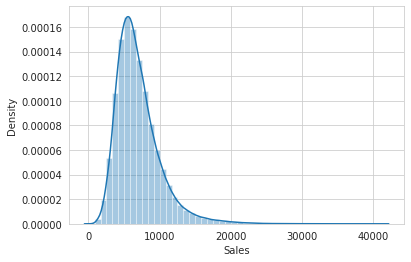

In [ ]:
#checking the distribution plot of the sales column.
sns.distplot(df['Sales'].astype(np.int64))

In [ ]:
vif_data = pd.DataFrame()
vif_data["feature"] = df_rms.columns

In [ ]:
def calc_vif(X):

    # Calculating VIF
    vif = pd.DataFrame()
    vif["variables"] = X.columns
    vif["VIF"] = [variance_inflation_factor(X.values, i) for i in range(X.shape[1])]

    return(vif)

In [ ]:
df_rms.columns

Index(['Store', 'DayOfWeek', 'Sales', 'Customers', 'Open', 'Promo',
       'StateHoliday', 'SchoolHoliday', 'StoreType', 'Assortment',
       'CompetitionDistance', 'Promo2', 'DayOfYear', 'WeekOfYear', 'Month',
       'Year'],
      dtype='object')

In [ ]:
vif_data.head()

,feature
0,Store
1,DayOfWeek
2,Sales
3,Customers
4,Open


In [ ]:
# calc_vif(df_rms[[i for i in df_rms.describe().columns if i not in ['Store','Sales','Open']]])

## <font color = "sky blue">**2. LARS Lasso Regression**

In [ ]:
las = LassoLars(alpha=0.3, fit_intercept=False, normalize=True)
lasreg = las.fit(X_train, y_train)

In [ ]:

def rmse(x, y):
    return sqrt(mean_squared_error(x, y))

train_score_2=lasreg.score(X_train, y_train)
test_score_2=lasreg.score(X_test, y_test)

print("Regresion Model Score" , ":" , train_score_2 , "," ,
      "Out of Sample Test Score" ,":" , test_score_2)

y_predicted = lasreg.predict(X_train)
y_test_predicted = lasreg.predict(X_test)

print("Training RMSE", ":", rmse(y_train, y_predicted),
      "Testing RMSE", ":", rmse(y_test, y_test_predicted))
print("Training MAPE: ", mean_absolute_percentage_error(y_train,  y_predicted),
      "Testing MAPE: ", mean_absolute_percentage_error(y_test, y_test_predicted))


Regresion Model Score : 0.8243758430350309 , Out of Sample Test Score : 0.822115619739854
Training RMSE : 1614.6277899669756 Testing RMSE : 1618.8368373647372
Training MAPE:  2.4820000909866288e+17 Testing MAPE:  2.45820998692159e+17


## 3. Ridge Regression

In [ ]:

ridge= Ridge(alpha=0.01)

In [ ]:
#FIT THE MODEL
ridge.fit(X_train,y_train)

Ridge(alpha=0.01)

In [ ]:

#check the score
ridge.score(X_train, y_train)

0.8672641038021657

In [ ]:
#get the X_train and X-test value
y_pred_train_ridge=ridge.predict(X_train)
y_pred_test_ridge=ridge.predict(X_test)

In [ ]:
#calculate MSE
MSE_r= mean_squared_error((y_train), (y_pred_train_ridge))
print("MSE :",MSE_r)

#calculate RMSE
RMSE_r=np.sqrt(MSE_r)
print("RMSE :",RMSE_r)


#calculate MAE
MAE_r= mean_absolute_error(y_train, y_pred_train_ridge)
print("MAE :",MAE_r)

#calculate r2 and adjusted r2
r2_r= r2_score(y_train, y_pred_train_ridge)
print("R2 :",r2_r)
Adjusted_R2_r=(1-(1-r2_score(y_train, y_pred_train_ridge))*((X_test.shape[0]-1)/(X_test.shape[0]-X_test.shape[1]-1)) )
print("Adjusted R2 :",1-(1-r2_score(y_train, y_pred_train_ridge))*((X_test.shape[0]-1)/(X_test.shape[0]-X_test.shape[1]-1)) )

MSE : 1970375.4143943856
RMSE : 1403.7006142316764
MAE : 950.9101265867146
R2 : 0.8672641038021657
Adjusted R2 : 0.8672543162703705


In [ ]:

#import the packages
from sklearn.metrics import mean_squared_error
#calculate MSE
MSE_r= mean_squared_error(y_test, y_pred_test_ridge)
print("MSE :",MSE_r)

#calculate RMSE
RMSE_r=np.sqrt(MSE_r)
print("RMSE :",RMSE_r)


#calculate MAE
MAE_r= mean_absolute_error(y_test, y_pred_test_ridge)
print("MAE :",MAE_r)


#import the packages
from sklearn.metrics import r2_score
#calculate r2 and adjusted r2
r2_r= r2_score((y_test), (y_pred_test_ridge))
print("R2 :",r2_r)
Adjusted_R2_r=(1-(1-r2_score((y_test), (y_pred_test_ridge)))*((X_test.shape[0]-1)/(X_test.shape[0]-X_test.shape[1]-1)) )
print("Adjusted R2 :",1-(1-r2_score((y_test), (y_pred_test_ridge)))*((X_test.shape[0]-1)/(X_test.shape[0]-X_test.shape[1]-1)) )

MSE : 1984360.3983096962
RMSE : 1408.6732759265706
MAE : 952.8047374325433
R2 : 0.8653047720664158
Adjusted R2 : 0.8652948400595976


## 4. Decision Tree Regression

In [ ]:
tree = DecisionTreeRegressor()
treereg = tree.fit(X_train, y_train)

In [ ]:
train_score_3=treereg.score(X_train, y_train)
test_score_3=treereg.score(X_test, y_test)

print("Regresion Model Score" , ":" , train_score_3 , "," ,
      "Test Score" ,":" , test_score_3)

y_predicted = treereg.predict(X_train)
y_test_predicted = treereg.predict(X_test)
print("Training RMSE", ":", rmse(y_train, y_predicted),
      "Testing RMSE", ":", rmse(y_test, y_test_predicted))
print("Training MAPE", ":", mean_absolute_percentage_error(y_train, y_predicted),
      "Testing MAPE", ":", mean_absolute_percentage_error(y_test, y_test_predicted))

Regresion Model Score : 1.0 , Test Score : 0.9729131295922986
Training RMSE : 0.0 Testing RMSE : 631.7039402905807
Training MAPE : 0.0 Testing MAPE : 0.05577490739359186


###<font color = "sky blue">**Hyperparameter tuning**

In [ ]:
# # #another script that takes toooo long, to find the right parameters for tree
# tree = DecisionTreeRegressor()
# rfr = RandomForestRegressor(n_jobs=-1)
# params = {
#          'min_samples_split':[2,3,5,7],
#          'min_samples_leaf':[6,8,10],
#          }

# grid = RandomizedSearchCV( estimator = rfr, param_distributions = params, verbose = True, cv = 10)
# #choosing 10 K-Folds makes sure i went through all of the data and didn't miss any pattern.

# grid.fit(X_train, y_train)
# grid.best_params_

In [ ]:
tree = DecisionTreeRegressor(min_samples_leaf=8,min_samples_split=5)
treereg = tree.fit(X_train, y_train)

In [ ]:

train_score_4=treereg.score(X_train, y_train)
test_score_4=treereg.score(X_test, y_test)

print("Regresion Model Score" , ":" , train_score_4 , "," ,
      "Test Score" ,":" , test_score_4)

y_predicted = treereg.predict(X_train)
y_test_predicted = treereg.predict(X_test)
print("Training RMSE", ":", rmse(y_train, y_predicted),
      "Testing RMSE", ":", rmse(y_test, y_test_predicted))
print("Training MAPE", ":", mean_absolute_percentage_error(y_train, y_predicted),
      "Testing MAPE", ":", mean_absolute_percentage_error(y_test, y_test_predicted))

Regresion Model Score : 0.9873960251903757 , Test Score : 0.9770379842615061
Training RMSE : 432.5477527210408 Testing RMSE : 581.619791001276
Training MAPE : 3144429201824.6733 Testing MAPE : 736055915740.5018


In [ ]:
dc_pred = pd.DataFrame(y_test_predicted[:100], columns = ['PredictedDC'])
dc_pred['index'] = range(0,100)

dc_real = y_test[:100]
dc_real = dc_real.reset_index()
dc_real.drop(['index'], axis = 1, inplace = True)
dc_real['index'] = range(0,100)
dataset_dc = pd.merge(dc_pred,dc_real, on = 'index',how = 'outer')

In [ ]:
dataset.head()

,PredictedLR,index,Sales,diff
0,8285.014116,0,8839,553.985884
1,5257.573984,1,5453,195.426016
2,5629.971166,2,5929,299.028834
3,8169.384045,3,7176,993.384045
4,11142.429054,4,16666,5523.570946


In [ ]:
#storing absolute diffrences between actual sales price and predicted
dataset_dc['diff']=(dataset_dc['Sales']-dataset_dc['PredictedDC']).abs()

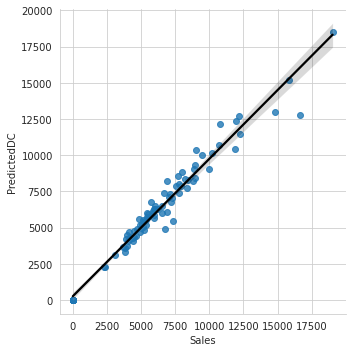

In [ ]:
#visualising our predictions
sns.lmplot(x='Sales', y='PredictedDC', data=dataset_dc, line_kws={'color': 'black'});

## 5. K-Nearest Neighbors Regression

In [ ]:
X_train.shape[0],y_train.shape[0]

(813767, 813767)

In [ ]:
X_t = X_train.iloc[0:100000]
y_t = y_train.iloc[0:100000]

In [ ]:
X_te = pd.DataFrame(X_test[0:20000])
y_te = y_test.iloc[0:20000]


In [ ]:
from sklearn.neighbors import KNeighborsRegressor
knn = KNeighborsRegressor(n_neighbors = 30)
knnreg = knn.fit(X_t, y_t)

In [ ]:
# #another script that takes toooo long, to find the right parameters for knn.
# print("Regresion Model Score" , ":" , knnreg.score(X_t, y_t) , "," ,
#       "Out of Sample Test Score" ,":" , knnreg.score(X_te, y_te))

# y_predicted = knnreg.predict(X_t)
# y_test_predicted = knnreg.predict(X_te)

# print("Training RMSE", ":", rmse(y_t, y_predicted),
#       "Testing RMSE", ":", rmse(y_te, y_test_predicted))
# print("Training MAPE", ":", mean_absolute_percentage_error(y_t, y_predicted),
#       "Testing MAPE", ":", mean_absolute_percentage_error(y_te, y_test_predicted))

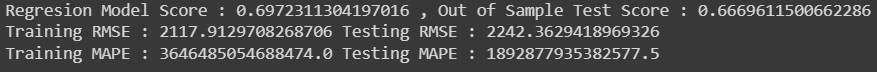

In [ ]:
from sklearn.neighbors import KNeighborsRegressor
knn = KNeighborsRegressor(n_neighbors = 30)
knnreg = knn.fit(X_train, y_train)

In [ ]:
# print("Regresion Model Score" , ":" , knnreg.score(X_train, y_train) , "," ,
#       "Out of Sample Test Score" ,":" , knnreg.score(X_test, y_test))

# y_predicted = knnreg.predict(X_train)
# y_test_predicted = knnreg.predict(X_test)

print("Training RMSE", ":", rmse(y_train, y_predicted),
      "Testing RMSE", ":", rmse(y_test, y_test_predicted))
print("Training MAPE", ":", mean_absolute_percentage_error(y_train, y_predicted),
      "Testing MAPE", ":", mean_absolute_percentage_error(y_test, y_test_predicted))

Training RMSE : 432.5477527210408 Testing RMSE : 581.619791001276
Training MAPE : 3144429201824.6733 Testing MAPE : 736055915740.5018


## 6. Random Forest With Hyper Parameter Tuning

In [ ]:
#import the packages
from sklearn.ensemble import RandomForestRegressor
# Create an instance of the RandomForestRegressor
rf_model = RandomForestRegressor(n_estimators=50, criterion='squared_error',random_state=1)

rf_model.fit(X_train,y_train)

RandomForestRegressor(n_estimators=50, random_state=1)

In [ ]:
# Making predictions on train and test data

y_pred_train_r = rf_model.predict(X_train)
y_pred_test_r = rf_model.predict(X_test)

In [ ]:
print("Model Score:",rf_model.score(X_train,y_train))

#calculate MSE
MSE_rf= mean_squared_error(y_train, y_pred_train_r)
print("MSE :",MSE_rf)

#calculate RMSE
RMSE_rf=np.sqrt(MSE_rf)
print("RMSE :",RMSE_rf)


#calculate MAE
MAE_rf= mean_absolute_error(y_train, y_pred_train_r)
print("MAE :",MAE_rf)

#calculate r2 and adjusted r2
r2_rf= r2_score(y_train, y_pred_train_r)
print("R2 :",r2_rf)
Adjusted_R2_rf=(1-(1-r2_score(y_train, y_pred_train_r))*((X_test.shape[0]-1)/(X_test.shape[0]-X_test.shape[1]-1)) )
print("Adjusted R2 :",1-(1-r2_score(y_train, y_pred_train_r))*((X_test.shape[0]-1)/(X_test.shape[0]-X_test.shape[1]-1)) )

Model Score: 0.997970031276109
MSE : 30133.52514366645
RMSE : 173.59010669870116
MAE : 103.4495948103081
R2 : 0.997970031276109
Adjusted R2 : 0.9979698815925343


In [ ]:

# Checking the Performance on test set

#calculate MSE
MSE_rf= mean_squared_error(y_test, y_pred_test_r)
print("MSE :",MSE_rf)

#calculate RMSE
RMSE_rf=np.sqrt(MSE_rf)
print("RMSE :",RMSE_rf)


#calculate MAE
MAE_rf= mean_absolute_error(y_test, y_pred_test_r)
print("MAE :",MAE_rf)


#calculate r2 and adjusted r2
r2_rf= r2_score((y_test), (y_pred_test_r))
print("R2 :",r2_rf)
Adjusted_R2_rf=(1-(1-r2_score((y_test), (y_pred_test_r)))*((X_test.shape[0]-1)/(X_test.shape[0]-X_test.shape[1]-1)) )
print("Adjusted R2 :",1-(1-r2_score((y_test), (y_pred_test_r)))*((X_test.shape[0]-1)/(X_test.shape[0]-X_test.shape[1]-1)) )

MSE : 1182921.9442817664
RMSE : 1087.6221514302504
MAE : 734.5601314979706
R2 : 0.9197051397274437
Adjusted R2 : 0.9196992190343952


## 7. XGBoost

In [ ]:
from xgboost import XGBRegressor
xgb = XGBRegressor(n_estimators=50, criterion='squared_error',random_state=1)

xgb.fit(X_train,y_train)

[16:54:37] WARNING: /workspace/src/objective/regression_obj.cu:152: reg:linear is now deprecated in favor of reg:squarederror.


XGBRegressor(criterion='squared_error', n_estimators=50, random_state=1)

In [ ]:
X_test = pd.DataFrame(X_test)

In [ ]:
# Making predictions on train and test data

y_pred_train_r = xgb.predict(X_train)
y_pred_test_r = xgb.predict(X_test)

In [ ]:
from sklearn.metrics import mean_squared_error
print("Model Score:",xgb.score(X_train,y_train))

#calculate MSE
MSE_rf= mean_squared_error(y_train, y_pred_train_r)
print("MSE :",MSE_rf)

#calculate RMSE
RMSE_rf=np.sqrt(MSE_rf)
print("RMSE :",RMSE_rf)


#calculate MAE
MAE_rf= mean_absolute_error(y_train, y_pred_train_r)
print("MAE :",MAE_rf)


#import the packages
from sklearn.metrics import r2_score
#calculate r2 and adjusted r2
r2_rf= r2_score(y_train, y_pred_train_r)
print("R2 :",r2_rf)
Adjusted_R2_rf=(1-(1-r2_score(y_train, y_pred_train_r))*((X_test.shape[0]-1)/(X_test.shape[0]-X_test.shape[1]-1)) )
print("Adjusted R2 :",1-(1-r2_score(y_train, y_pred_train_r))*((X_test.shape[0]-1)/(X_test.shape[0]-X_test.shape[1]-1)) )

Model Score: 0.9213358127165746
MSE : 1167717.1364825265
RMSE : 1080.6096133583703
MAE : 731.865224891246
R2 : 0.9213358127165746
Adjusted R2 : 0.9213300122642762


In [ ]:
# storing the test set metrics value in a dataframe for later comparison
dict1={'Model':'XGBRegressor ',
       'MAE':round((MAE_rf),3),
       'MSE':round((MSE_rf),3),
       'RMSE':round((RMSE_rf),3),
       'R2_score':round((r2_rf),3),
       'Adjusted R2':round((Adjusted_R2_rf ),2)}
# training_df=training_df.append(dict1,ignore_index=True)

In [ ]:

#calculate MSE
MSE_rf= mean_squared_error(y_test, y_pred_test_r)
print("MSE :",MSE_rf)

#calculate RMSE
RMSE_rf=np.sqrt(MSE_rf)
print("RMSE :",RMSE_rf)

#calculate MAE
MAE_rf= mean_absolute_error(y_test, y_pred_test_r)
print("MAE :",MAE_rf)

#calculate r2 and adjusted r2
r2_rf= r2_score((y_test), (y_pred_test_r))
print("R2 :",r2_rf)
Adjusted_R2_rf=(1-(1-r2_score((y_test), (y_pred_test_r)))*((X_test.shape[0]-1)/(X_test.shape[0]-X_test.shape[1]-1)) )
print("Adjusted R2 :",1-(1-r2_score((y_test), (y_pred_test_r)))*((X_test.shape[0]-1)/(X_test.shape[0]-X_test.shape[1]-1)) )

MSE : 1182921.9442817664
RMSE : 1087.6221514302504
MAE : 734.5601314979706
R2 : 0.9197051397274437
Adjusted R2 : 0.9196992190343952


In [ ]:
t2 = time.time()
print(f"Execution time = {round((t2-t1)/60,2)} mins" )